# AI Art Detector: Distinguishing AI-Generated vs Human-Created Ukiyo-e Art


## 1. Data Collection and Loading

### 1.1 Dataset Loading

Dataset Statistics:
Total images: 2475
Human images: 1167
AI images: 1308

Image Dimensions Statistics:

Human Images:
Width  - Mean: 1691, Min: 1381, Max: 6273
Height - Mean: 1856, Min: 1381, Max: 5839

AI Images:
Width  - Mean: 768, Min: 768, Max: 768
Height - Mean: 768, Min: 768, Max: 768


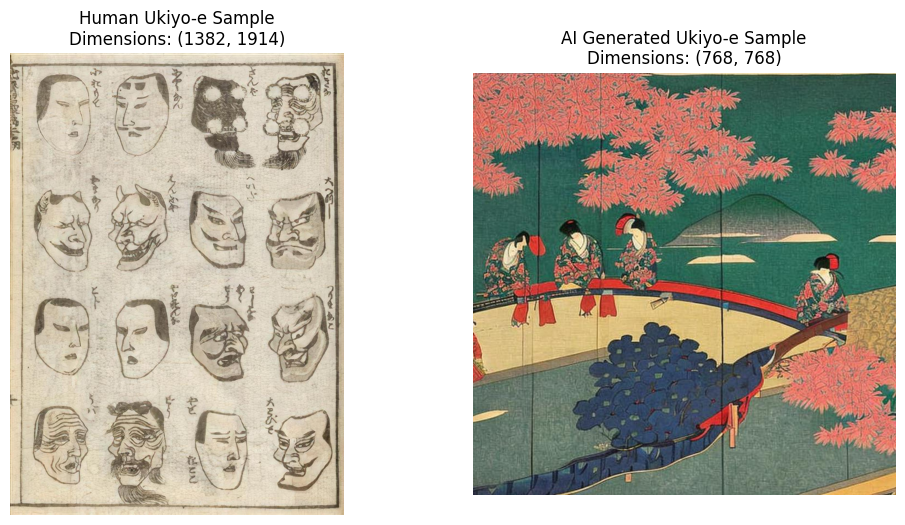

In [6]:
# Import dataset locally
from data_preprocessing.loader import load_ukiyo_e_dataset
df = load_ukiyo_e_dataset()

### 1.2 Dataset Information

In [6]:
df

,path,width,height,label
0,data/Human_Ukiyo_e/utagawa-kunisada_not_detect...,1382,2078,human
1,data/Human_Ukiyo_e/utagawa-kuniyoshi_yada-goro...,1382,1949,human
2,data/Human_Ukiyo_e/tsukioka-yoshitoshi_lin-cho...,1382,4272,human
3,data/Human_Ukiyo_e/utagawa-kuniyoshi_women-23.jpg,6273,1382,human
4,data/Human_Ukiyo_e/utagawa-kunisada_not_detect...,1382,2154,human
...,...,...,...,...
2470,data/AI_SD_ukiyo-e/9-934092758-844990.jpg,768,768,ai
2471,data/AI_SD_ukiyo-e/9-964411806-595958.jpg,768,768,ai
2472,data/AI_SD_ukiyo-e/9-846172161-510890.jpg,768,768,ai
2473,data/AI_SD_ukiyo-e/9-955674977-242618.jpg,768,768,ai


In [2]:
from data_preprocessing.standarize import get_image_metadata, get_dataset_statistics, print_dataset_summary

get_dataset_statistics(df)


{'total_images': 2475,
 'ai_generated': 1308,
 'human_created': 1167,
 'training_samples': 1732,
 'validation_samples': 371,
 'test_samples': 372}

In [3]:
print_dataset_summary(df)

=== Dataset Summary ===

Total Images: 2475
AI Generated: 1308
Human Created: 1167

Suggested Split:
Training: 1732
Validation: 371
Test: 372

Unique Image Dimensions:
AI Generated Images:
  768x768
Human Created Images:
  1382x2078
  1382x1949
  1382x4272
  6273x1382
  1382x2154
  1908x1382
  1382x2167
  1382x1991
  1382x1968
  2716x1382
  1382x1872
  1382x2142
  2089x1382
  1382x2001
  1382x1957
  2131x1382
  2010x1382
  1382x2050
  1382x3139
  1382x2118
  1382x2080
  1382x1961
  1382x2038
  2023x1382
  1870x1382
  2159x1382
  1382x1829
  1382x2146
  1935x1382
  1382x2010
  2054x1382
  2026x1382
  1381x2489
  1965x1382
  1382x1952
  1382x4265
  2051x1382
  1382x2032
  1852x1382
  2099x1382
  1381x2008
  1382x2215
  2839x1382
  1382x1506
  1382x2020
  1882x1382
  1914x1382
  2078x1382
  1382x2052
  1382x2186
  1382x1482
  1382x2113
  1382x2059
  1382x2051
  1382x1546
  1382x2034
  1382x1608
  1382x2141
  1945x1382
  2113x1382
  1961x1382
  2269x1382
  1382x2183
  1382x2159
  2861x1382

## 2. Data Exploration

### 2.1 Basic Dataset Statistics/Analysis

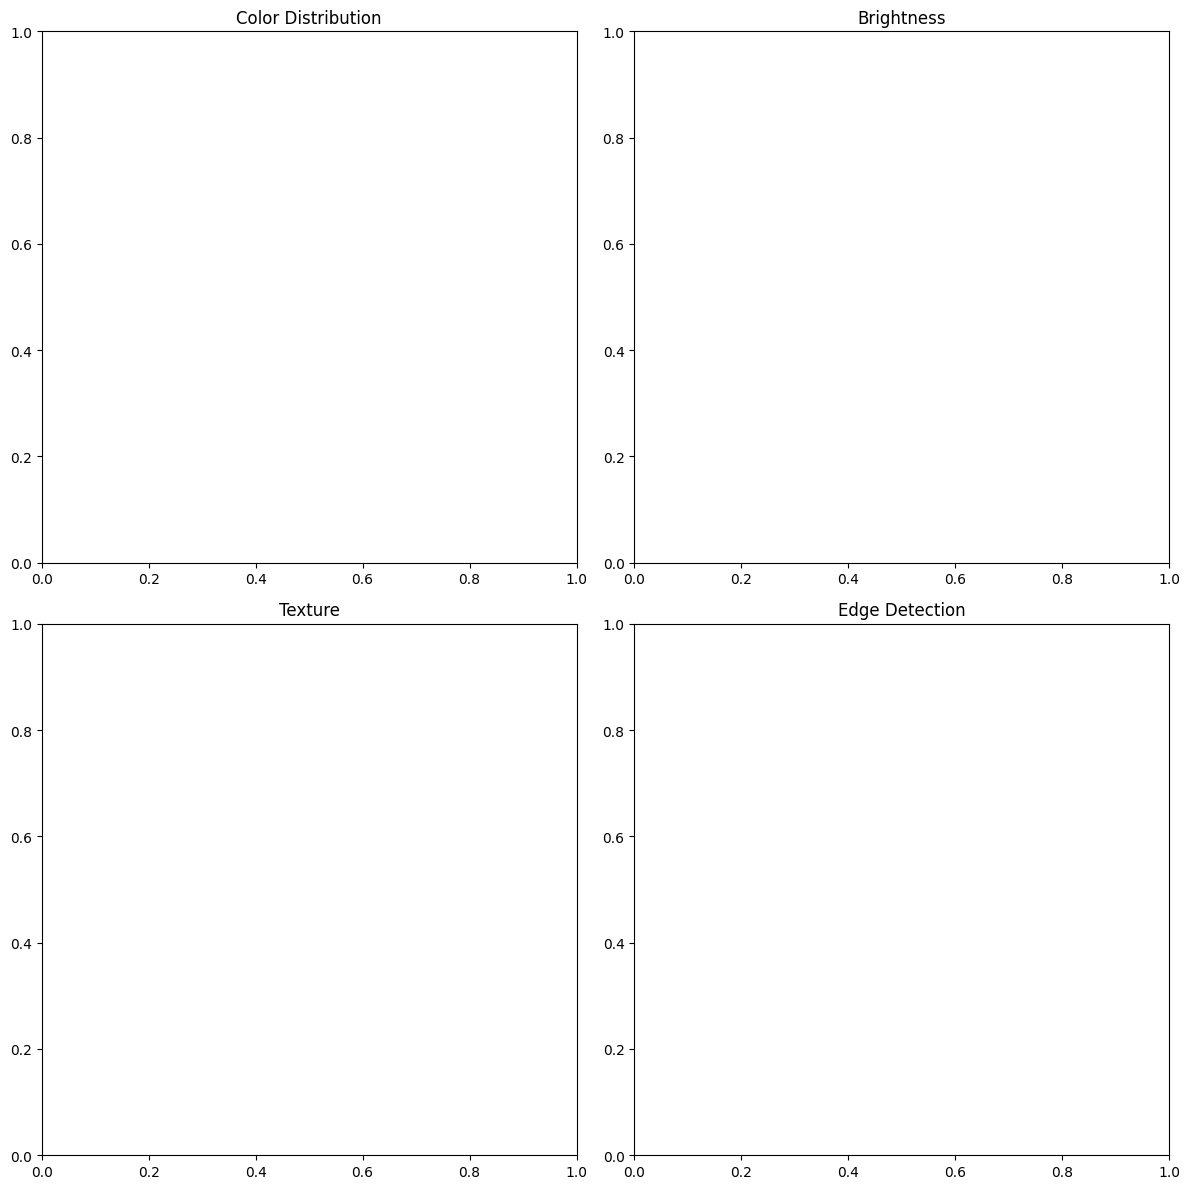

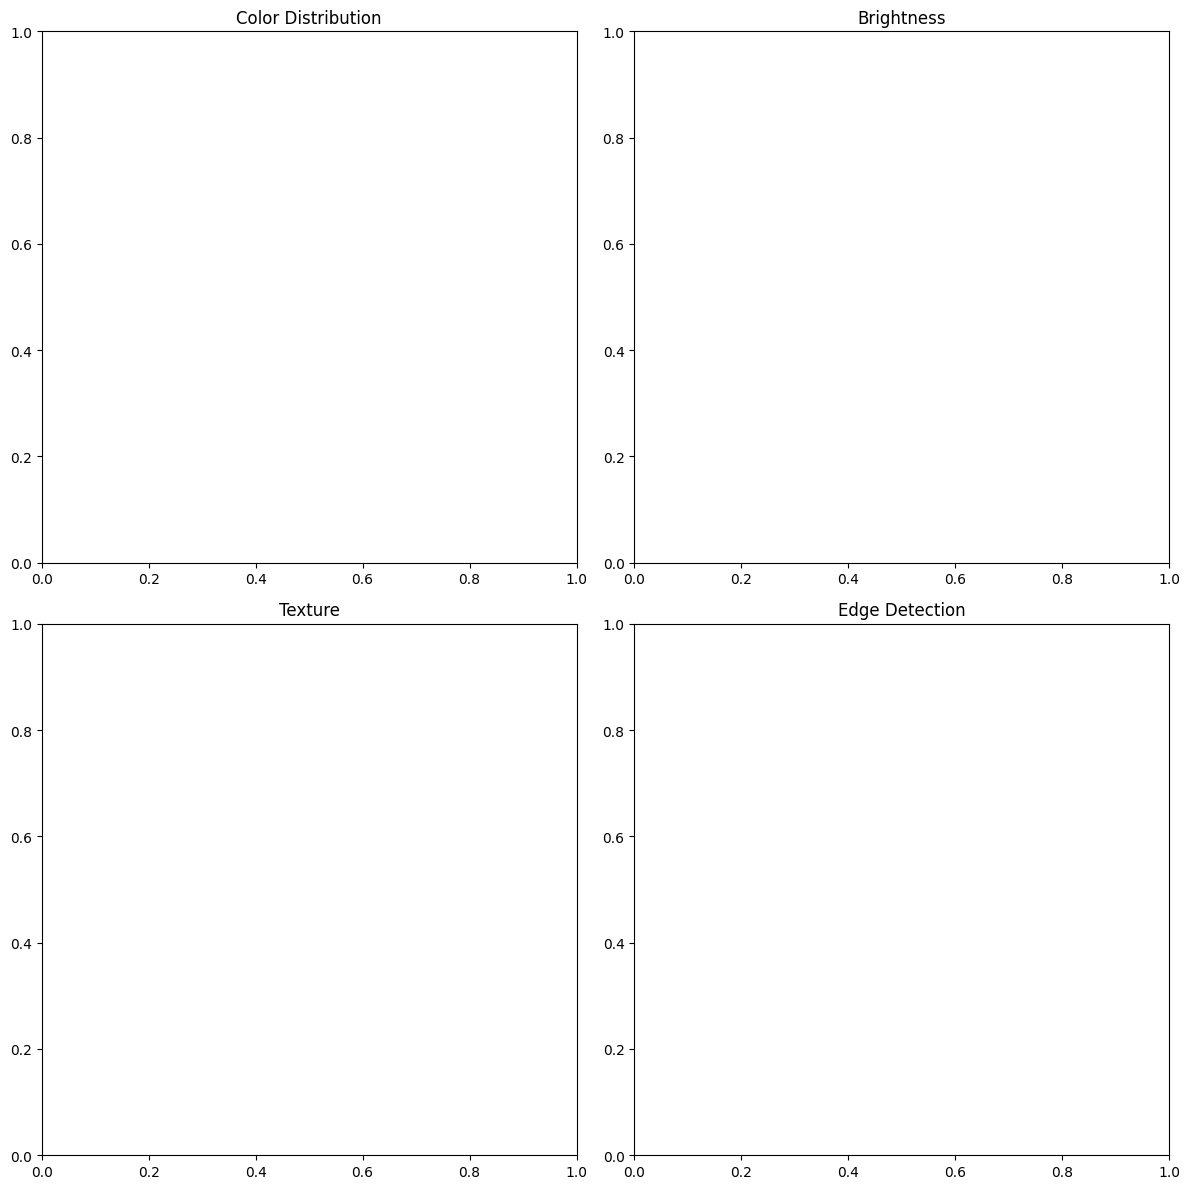

In [ ]:
from data_preprocessing.analyze import plot_feature_distributions
plot_feature_distributions()

### 2.2 Color Analysis (Saturation)

### 2.3 Brightness Analysis

## 3. Data Preprocessing


### 3.1 Image Standardization

### 3.2 Feature Extraction

## 4. Model Implementation

### 4.1 Logisic Regression

In [4]:
from model.logistic import LogisticRegression

### 4.2 CNN

In [5]:
from model.cnn import CNN

## 5. Model Training and Evaluation

### 5.1 Logistic Regression Training Pipeline

### 5.2 Logistic Regression Evaluation Pipeline

### 5.3 CNN Evaluation Pipeline

### 5.4 CNN Evaluation Pipeline

## 6. Results and Visualization


## 7. Model Export for Streamlit
